
## Abstract
This analysis aims to evaluate the performance of football clubs based on their match outcomes, specifically focusing<br>
on points earned, win rates, and goal differences. The study utilizes match data to calculate and aggregate these<br>
metrics for both home and away games. By integrating this data, the analysis provides a comprehensive view of each<br>
club's performance over the season.

<b>Comparative Analysis of Clubs in DerbiesObjective:</b> Compare the performance of different clubs in derby matches.
 
<b>Approach:</b> Calculate performance metrics for each club in derbies (e.g., win rate, goal difference).<br>
Create comparative plots to show which clubs perform better in derby situations.<br>
Analyze any patterns or consistent trends in club performance.<br>
We also integrated a points award system. This one is commonly used in soccer context to determine the<br>
rankings and standings of clubs in a league. Here’s a breakdown of how points are typically used and<br>
what they signify:

### Points System
* <b>Win:</b> A club earns 3 points for winning a match.
* <b>Draw:</b> Both clubs earn 1 point each for a draw.
* <b>Loss:</b> A club earns 0 points for losing a match.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import string
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

### IMPORT CSV

In [2]:
df_games = pd.read_csv('AssignmentData/games.csv')

pd.set_option('display.max_columns', None) # Display all columns

### Data Cleaning for df_games

In [3]:
df_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [4]:
df_games = df_games[
['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_name',
       'away_club_name', 'aggregate', 'competition_type']
]

In [5]:
df_games.head(2)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league


### Calculate points per match
<b>calculate_points</b> function determines the points awarded to home and away teams (3 for a win, 0 for a loss, and 1 each for a draw). 

In [6]:
# Calculate the points for home and away teams based on the goals scored in each match.
def calculate_points(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return (3, 0)  # Home win
    elif row['home_club_goals'] < row['away_club_goals']:
        return (0, 3)  # Away win
    else:
        return (1, 1)  # Draw

# Apply the function and assign the result to new columns 
df_games[['home_points', 'away_points']] = df_games.apply(calculate_points, axis=1, result_type='expand') # apply function applies calculate_points function to each row in df_games DataFrame.
df_games.head(2)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_name,away_club_name,aggregate,competition_type,home_points,away_points
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,3,0
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,0,3


### Calculate win rate and goal difference
To calculate aggregated metrics for home and away teams.

In [7]:
# Calculate win rate and goal difference for home clubs
home_metrics = df_games.groupby('home_club_id').agg({ # Groups data by home_club_id and calculates sum of home points, home goals, away goals conceded, and count of matches played.
    'home_points': 'sum',
    'home_club_goals': 'sum',
    'away_club_goals': 'sum',
    'game_id': 'count'
}).rename(columns={'game_id': 'matches_played'}).reset_index()

# Rename home_club_id to club_id
home_metrics.rename(columns={'home_club_id': 'club_id'}, inplace=True)

# Calculate win rate and goal difference for away clubs
away_metrics = df_games.groupby('away_club_id').agg({ # Groups data by away_club_id and calculates sum of away points, away goals, home goals conceded, and count of matches played.
    'away_points': 'sum',
    'away_club_goals': 'sum',
    'home_club_goals': 'sum',
    'game_id': 'count'
}).rename(columns={'game_id': 'matches_played'}).reset_index()

# Rename away_club_id to club_id
away_metrics.rename(columns={'away_club_id': 'club_id'}, inplace=True)

# Ensures no NaN values in home_metrics and away_metrics
home_metrics = home_metrics.fillna(0)
away_metrics = away_metrics.fillna(0)

home_metrics

,club_id,home_points,home_club_goals,away_club_goals,matches_played
0,1,24,29,30,12
1,2,15,27,32,11
2,3,194,212,209,150
3,4,66,75,96,60
4,5,527,456,264,277
...,...,...,...,...,...
2399,111469,0,2,4,1
2400,112611,6,8,12,3
2401,112615,0,0,2,1
2402,112751,3,2,13,2


### Combine home and away metrics
Combines home and away metrics into a single DataFrame.

In [8]:
combined_metrics = home_metrics.set_index('club_id').add(away_metrics.set_index('club_id'), fill_value=0).reset_index()

In [9]:
combined_metrics.head(5)

,club_id,away_club_goals,away_points,home_club_goals,home_points,matches_played
0,1,30.0,NaN,29.0,24.0,12.0
1,2,69.0,24.0,51.0,15.0,24.0
2,3,458.0,192.0,520.0,194.0,322.0
3,4,191.0,65.0,221.0,66.0,127.0
4,5,681.0,416.0,807.0,527.0,543.0


### Add Club Names
Add club names to the combined_metrics DataFrame.

In [10]:
# The add_club_name function checks each club_id in combined_metrics against 
# home_club_id and away_club_id in df_games to fetch the club names.
# If club_id is not found, it assigns 'Unknown'.
def add_club_name(combined_metrics, df_games):
    # Create an empty list to store club names
    club_names = []

    # Iterate through each row in combined_metrics
    for index, row in combined_metrics.iterrows():
        # Check if club_id exists in home_club_id of df_games
        home_club = df_games[df_games['home_club_id'] == row['club_id']]['home_club_name'].values
        if len(home_club) > 0:
            club_names.append(home_club[0])
        else:
            # Check if club_id exists in away_club_id of df_games
            away_club = df_games[df_games['away_club_id'] == row['club_id']]['away_club_name'].values
            if len(away_club) > 0:
                club_names.append(away_club[0])
            else:
                club_names.append('Unknown')  # Default value if club_id is not found in df_games

    # Add club_names as a new column to combined_metrics
    combined_metrics['club_name'] = club_names
    return combined_metrics

# Call the function
combined_metrics = add_club_name(combined_metrics, df_games)

### Cleaning Data
Clean rows with club_name equal to NaN.

In [11]:
# Remove all rows where club_name is NaN
combined_metrics = combined_metrics.dropna(subset=['club_name'])

combined_metrics[combined_metrics['club_name'].isna()] # Verify if NaN rows have been succesfully removed from combined_metrics DataFrame

,club_id,away_club_goals,away_points,home_club_goals,home_points,matches_played,club_name


### Calculate additional metrics
Calculates win rate and goal difference for each club.

In [12]:
# Measures win_rate as the ratio of points earned to maximum possible points, and goal_difference as the difference between goals scored and conceded.
combined_metrics['win_rate'] = combined_metrics['home_points'] / (combined_metrics['matches_played'] * 3)
combined_metrics['goal_difference'] = combined_metrics['home_club_goals'] - combined_metrics['away_club_goals']
combined_metrics

,club_id,away_club_goals,away_points,home_club_goals,home_points,matches_played,club_name,win_rate,goal_difference
2,3,458.0,192.0,520.0,194.0,322.0,1. Fußball-Club Köln,0.200828,62.0
3,4,191.0,65.0,221.0,66.0,127.0,1.FC Nuremberg,0.173228,30.0
4,5,681.0,416.0,807.0,527.0,543.0,Associazione Calcio Milan,0.323511,126.0
5,6,45.0,10.0,50.0,15.0,34.0,Adanaspor,0.147059,5.0
9,10,145.0,48.0,150.0,57.0,94.0,Arminia Bielefeld,0.202128,5.0
...,...,...,...,...,...,...,...,...,...
2383,60949,171.0,79.0,187.0,91.0,135.0,Neos Podosferikos Syllogos Volou,0.224691,16.0
2392,61825,112.0,36.0,144.0,58.0,102.0,FK Minaj,0.189542,32.0
2400,63007,27.0,9.0,28.0,20.0,22.0,LNZ Cherkasy,0.303030,1.0
2454,68608,201.0,102.0,266.0,140.0,204.0,CF Os Belenenses,0.228758,65.0


### Generate and Visualize highest win rate in all matches
Sorts the clubs by win_rate in descending order, selects the top 50, and creates a bar plot.

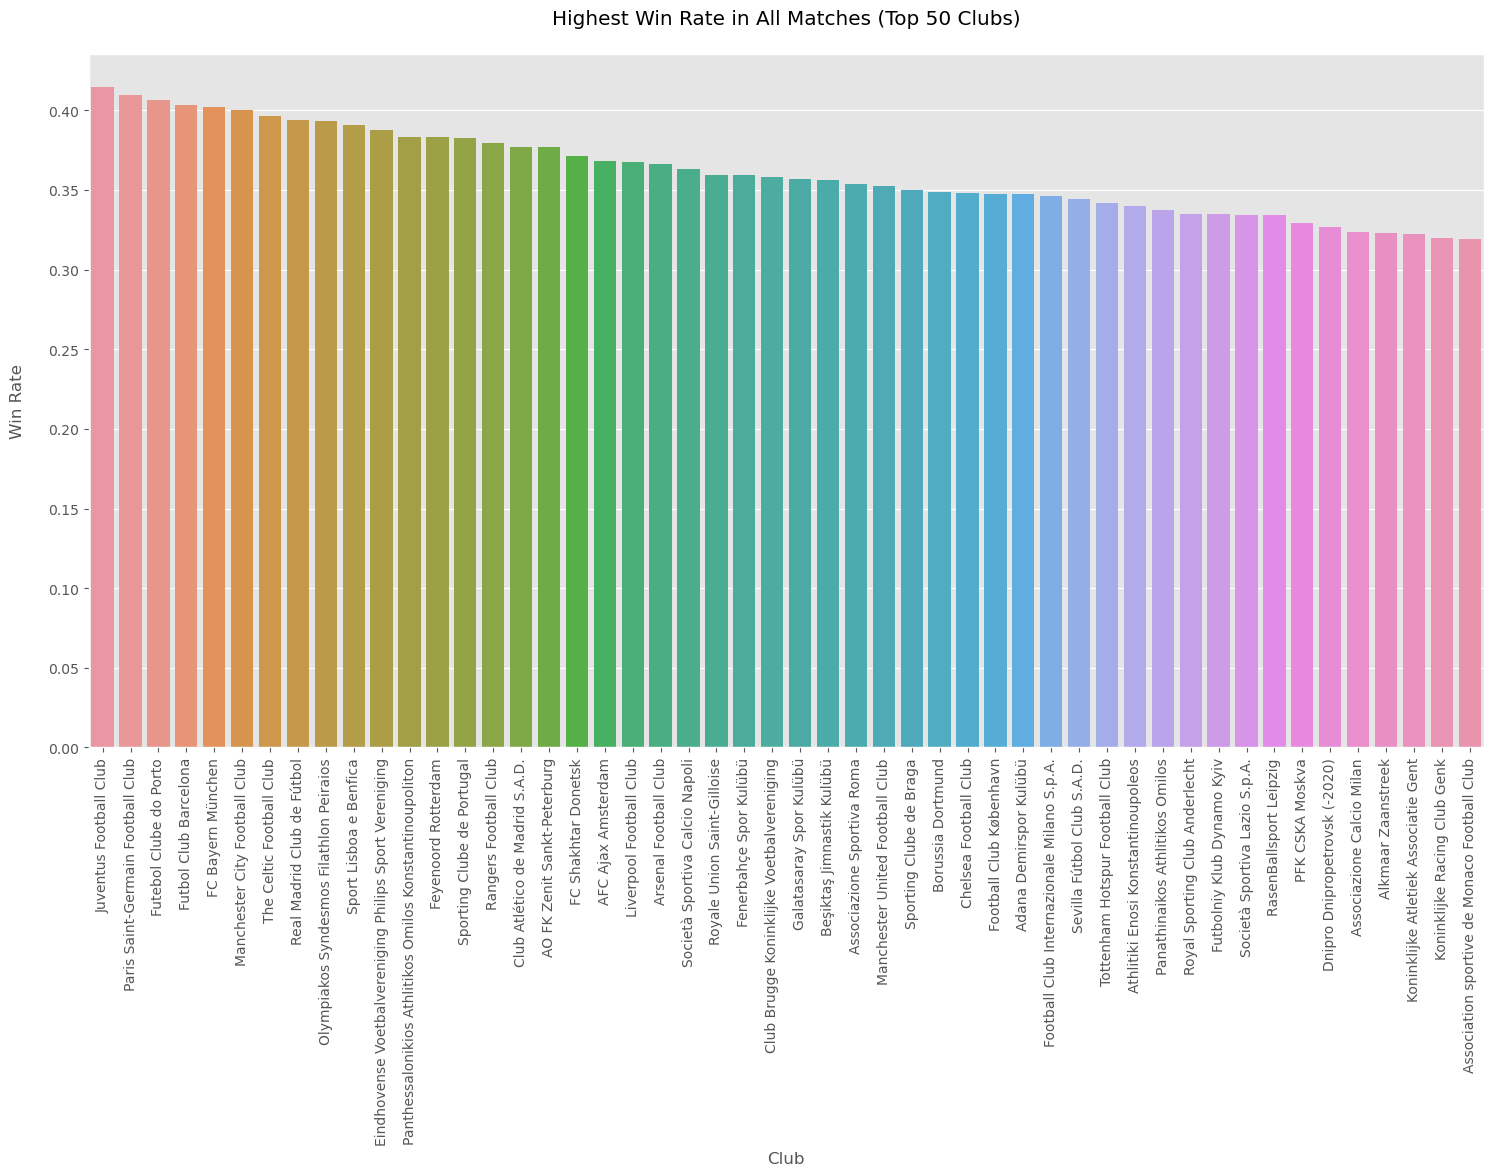

In [13]:
# Sort combined_metrics by win_rate in descending order
combined_metrics_sorted = combined_metrics.sort_values(by='win_rate', ascending=False)

# Select the top 20 clubs by win rate
top_50_clubs = combined_metrics_sorted.head(50)
# Set club_name as index
top_50_clubs = top_50_clubs.set_index('club_name')

# Plot win rate for the top 20 clubs with club names on x-axis
plt.figure(figsize=(18, 9))
sns.barplot(x=top_50_clubs.index, y='win_rate', data=top_50_clubs, order=top_50_clubs.index)
plt.title('Highest Win Rate in All Matches (Top 50 Clubs)\n')
plt.xlabel('Club')
plt.ylabel('Win Rate\n')
plt.xticks(rotation=90)
plt.show()


### Generate and Visualize lowest win rate in all matches
Sorts the clubs by win_rate in ascending order, selects the top 50, and creates a bar plot.

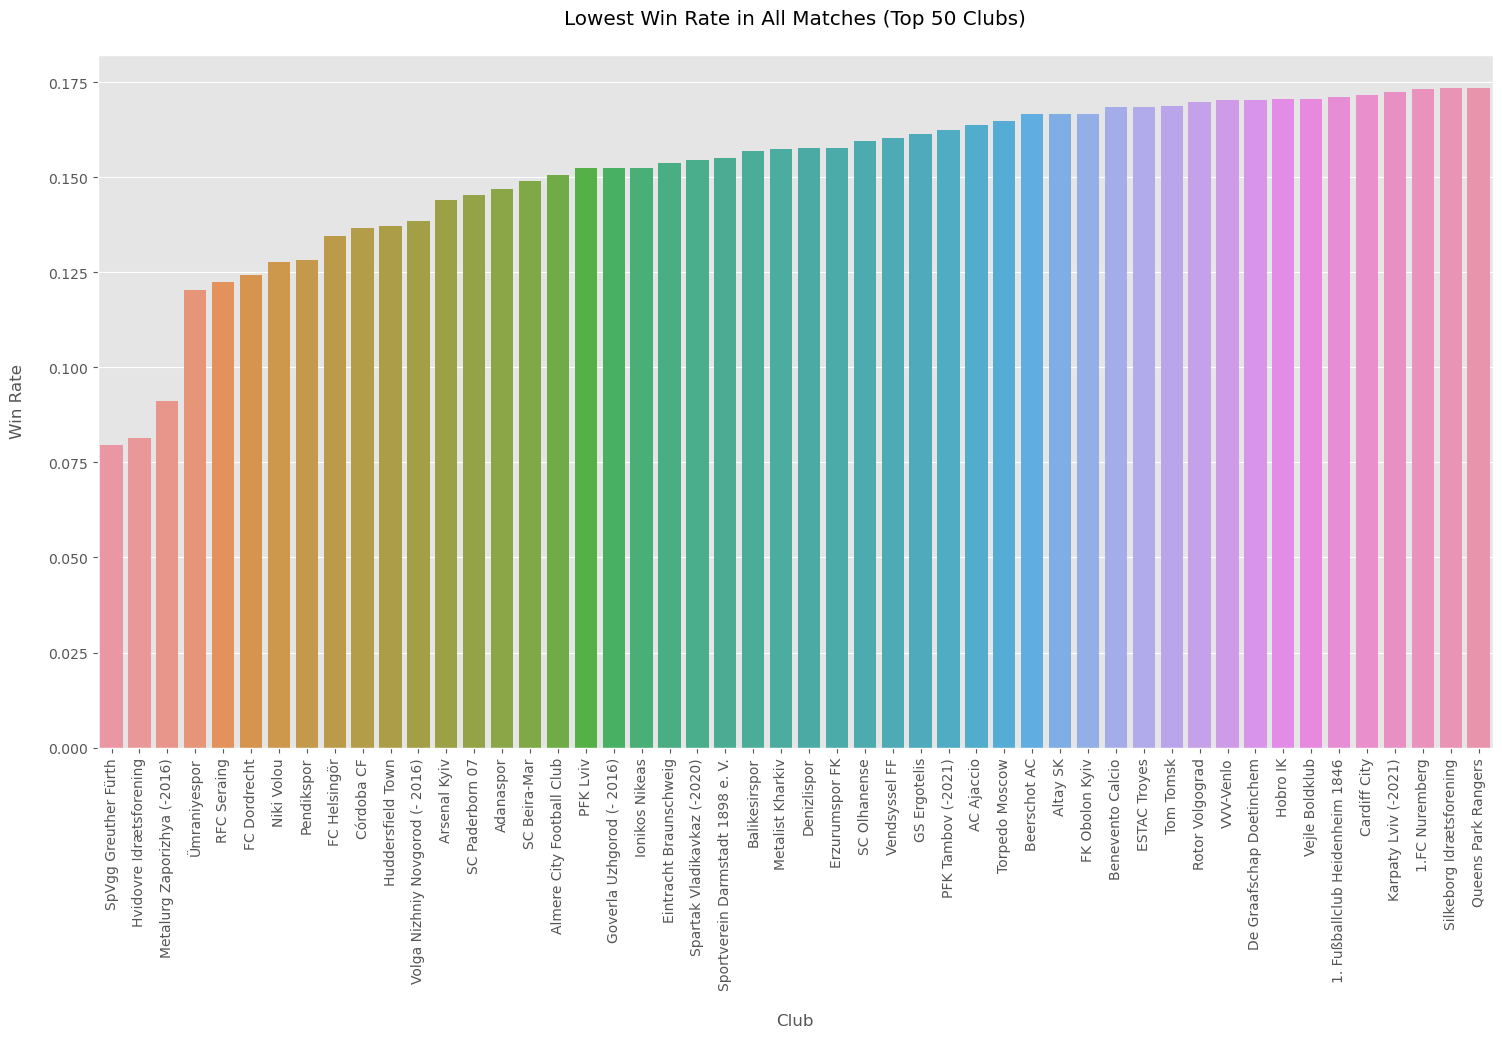

In [14]:
# Sort combined_metrics by win_rate in descending order
combined_metrics_sorted = combined_metrics.sort_values(by='win_rate', ascending=True)

# Select the top 20 clubs by win rate
top_50_clubs = combined_metrics_sorted.head(50)
# Set club_name as index
top_50_clubs = top_50_clubs.set_index('club_name')

# Plot win rate for the top 20 clubs with club names on x-axis
plt.figure(figsize=(18, 9))
sns.barplot(x=top_50_clubs.index, y='win_rate', data=top_50_clubs, order=top_50_clubs.index)
plt.title('Lowest Win Rate in All Matches (Top 50 Clubs)\n')
plt.xlabel('\nClub')
plt.ylabel('Win Rate\n')
plt.xticks(rotation=90)
plt.show()


### Generate and Visualize Global View of Goal Difference in All Matches
Sorts clubs by win_rate and plots the goal difference for all clubs.

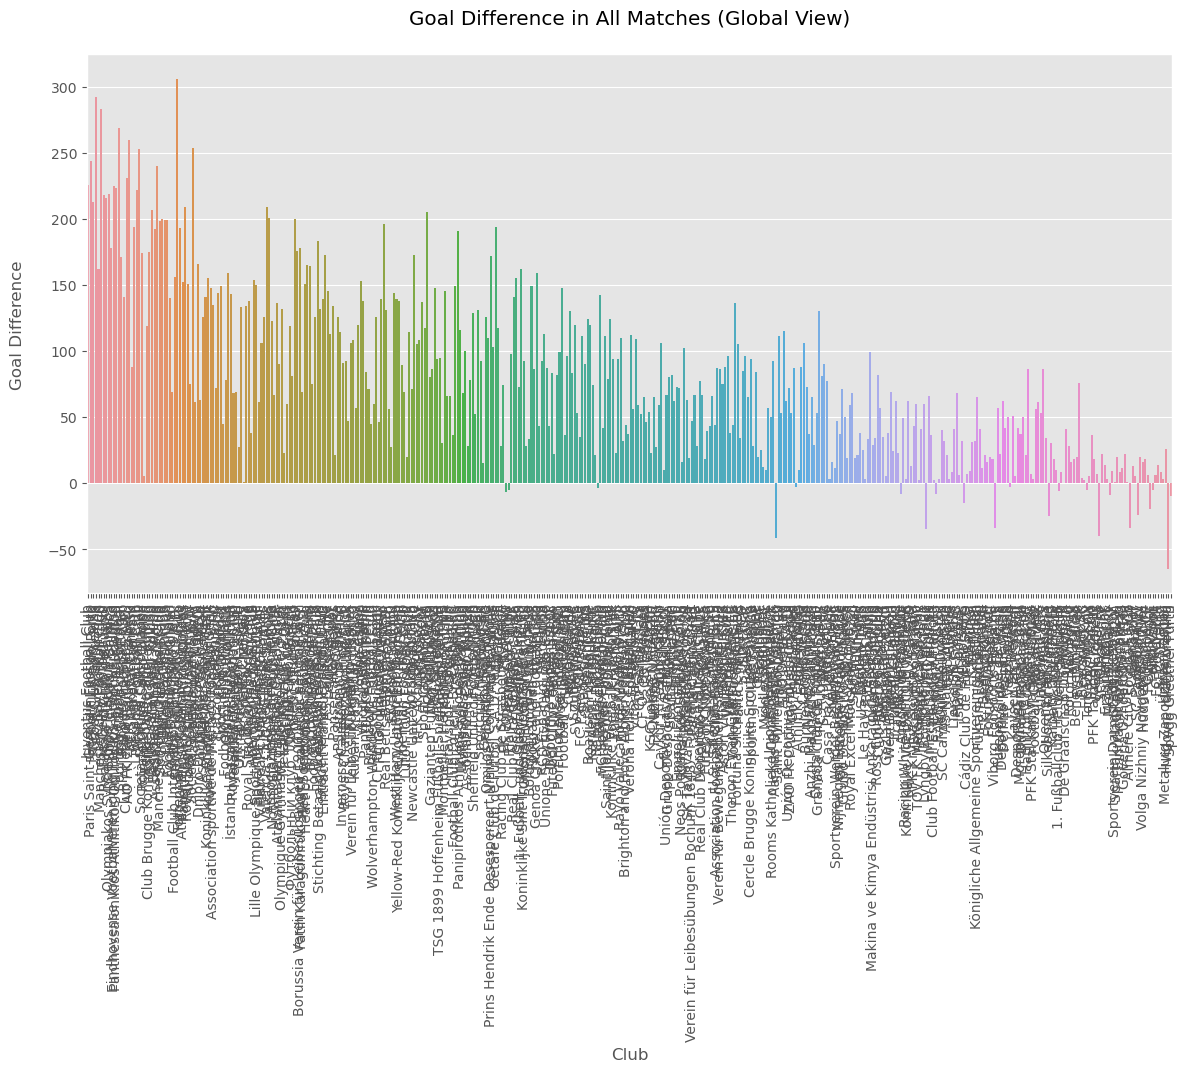

In [15]:
# Plot goal difference

# Sort combined_metrics by win_rate in descending order
combined_metrics_sorted = combined_metrics.sort_values(by='win_rate', ascending=False)

# Select the top 20 clubs by win rate
top_20_clubs = combined_metrics_sorted
# Set club_name as index
top_20_clubs = top_20_clubs.set_index('club_name')


plt.figure(figsize=(14, 7))
sns.barplot(x=top_20_clubs.index, y='goal_difference', data=top_20_clubs)
plt.title('Goal Difference in All Matches (Global View)\n')
plt.xlabel('Club')
plt.ylabel('Goal Difference\n')
plt.xticks(rotation=90)
plt.show()

### Generate and Visualize Highest Goal Difference in All Matches
Sorts clubs by win_rate, select the top 50, plots the goal difference for all clubs.

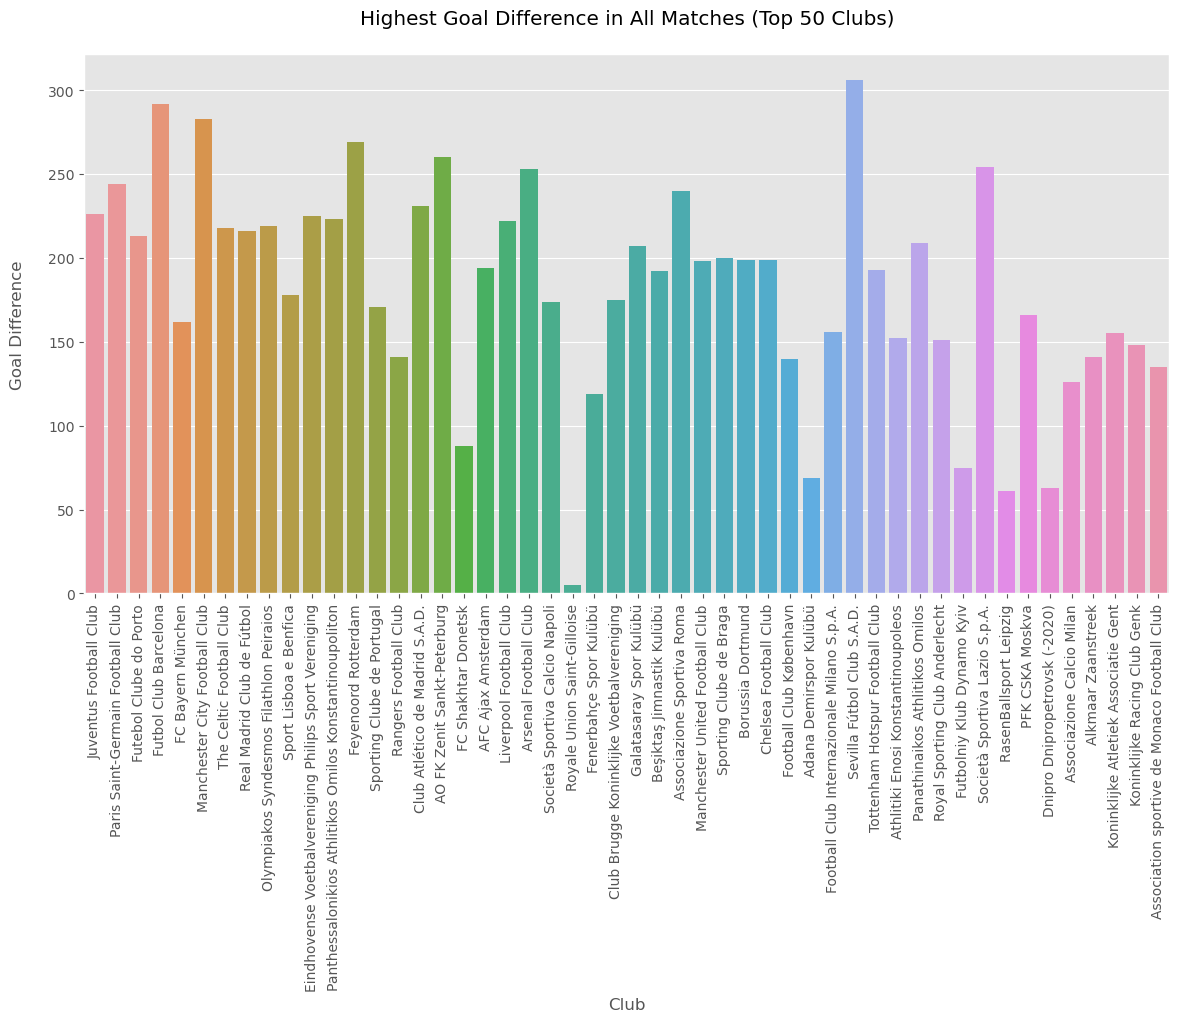

In [16]:
# Plot goal difference

# Sort combined_metrics by win_rate in descending order
combined_metrics_sorted = combined_metrics.sort_values(by='win_rate', ascending=False)

# Select the top 20 clubs by win rate
top_50_clubs = combined_metrics_sorted.head(50)
# Set club_name as index
top_50_clubs = top_50_clubs.set_index('club_name')



plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_clubs.index, y='goal_difference', data=top_50_clubs)
plt.title('Highest Goal Difference in All Matches (Top 50 Clubs)\n')
plt.xlabel('Club')
plt.ylabel('Goal Difference\n')
plt.xticks(rotation=90)
plt.show()


### Generate and Visualize Lowest Goal Difference in All Matches
Sorts clubs by win_rate, select the top 50, plots the goal difference for all clubs.

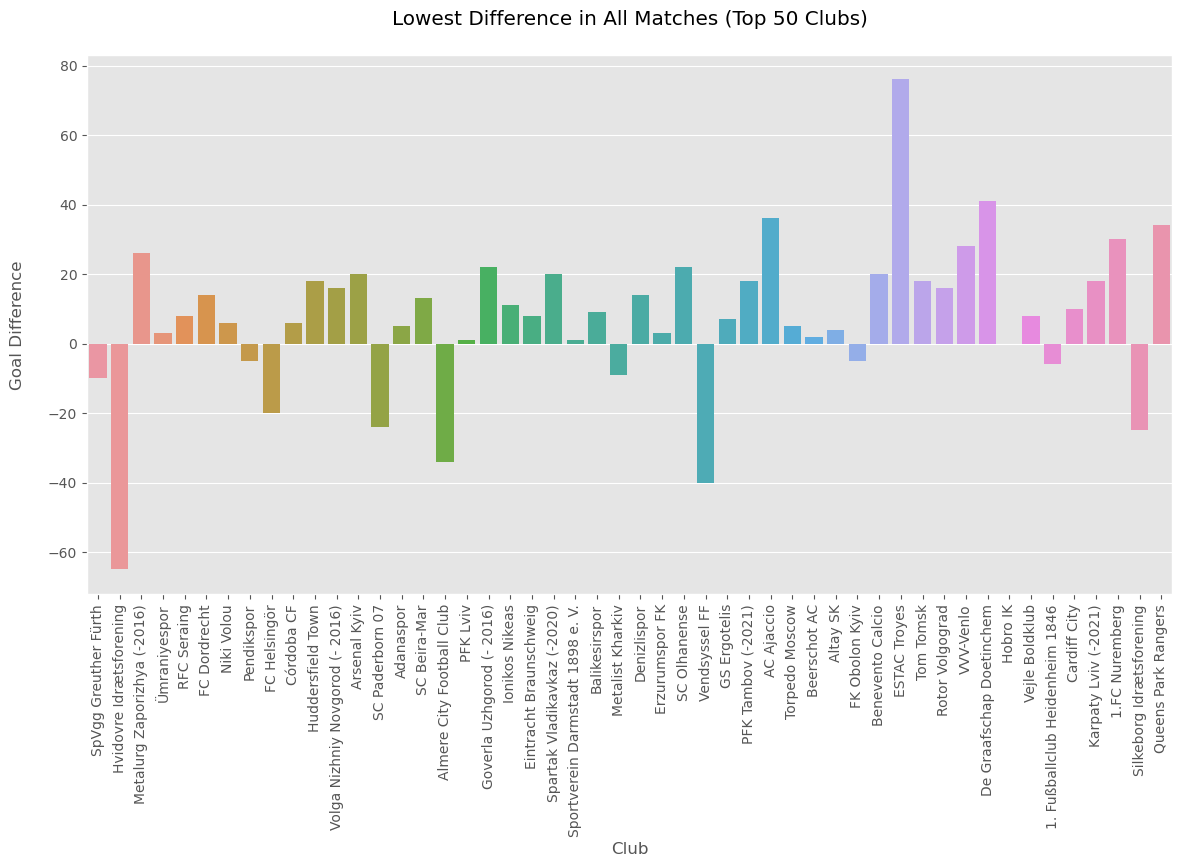

In [17]:
# Plot goal difference

# Sort combined_metrics by win_rate in ascending order
combined_metrics_sorted = combined_metrics.sort_values(by='win_rate', ascending=True)

# Select the top 20 clubs by win rate
top_50_clubs = combined_metrics_sorted.head(50)
# Set club_name as index
top_50_clubs = top_50_clubs.set_index('club_name')
# sns.barplot(x=top_20_clubs.index, y='win_rate', data=top_20_clubs, order=top_20_clubs.index)


plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_clubs.index, y='goal_difference', data=top_50_clubs)
plt.title('Lowest Difference in All Matches (Top 50 Clubs)\n')
plt.xlabel('Club')
plt.ylabel('Goal Difference\n')
plt.xticks(rotation=90)
plt.show()


### Generate and Visualize Negative Goal Difference in All Matches
Sorts clubs by win_rate, select elements with negative values, plots the goal difference for all clubs.

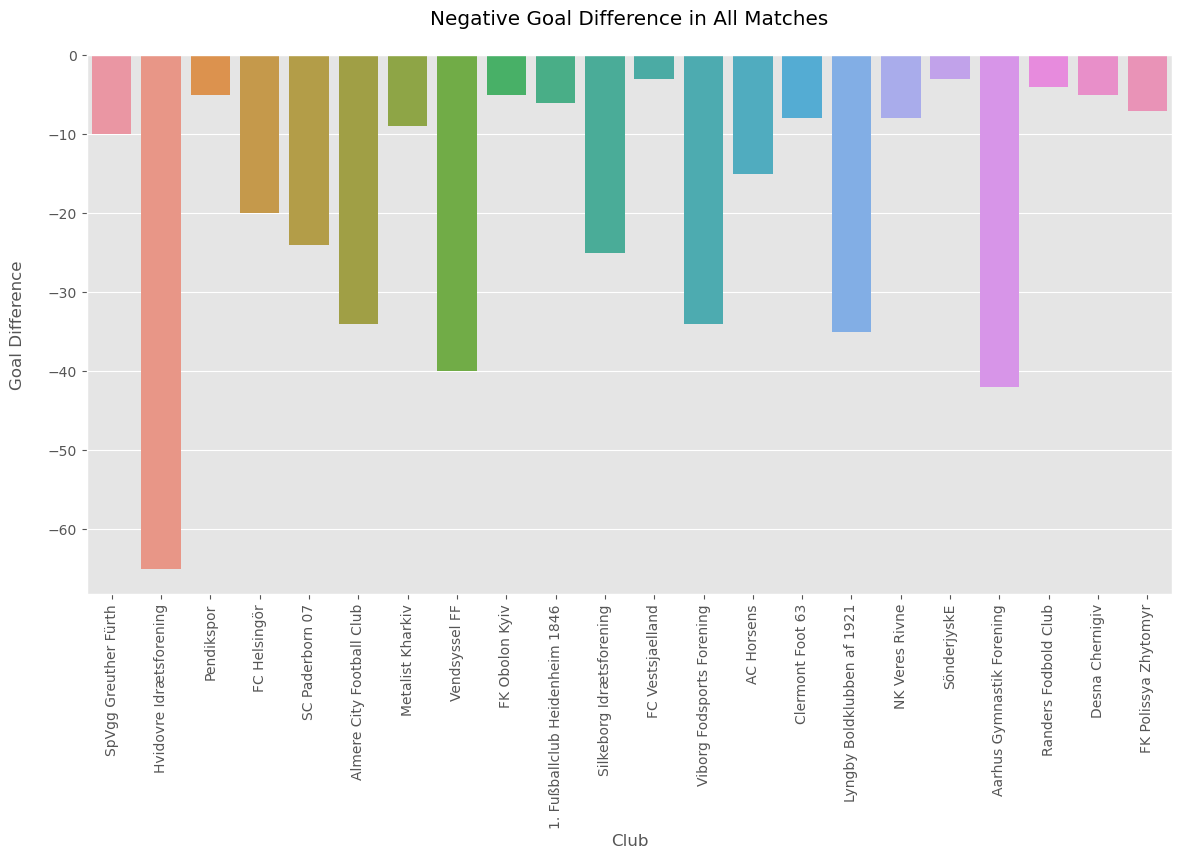

,club_id,away_club_goals,away_points,home_club_goals,home_points,matches_played,win_rate,goal_difference
club_name,,,,,,,,
SpVgg Greuther Fürth,65,143.0,42.0,133.0,21.0,88.0,0.079545,-10.0
Hvidovre Idrætsforening,1894,120.0,45.0,55.0,11.0,45.0,0.081481,-65.0
Pendikspor,3209,25.0,8.0,20.0,5.0,13.0,0.128205,-5.0
FC Helsingör,22110,102.0,47.0,82.0,21.0,52.0,0.134615,-20.0
SC Paderborn 07,127,176.0,55.0,152.0,41.0,94.0,0.145390,-24.0
Almere City Football Club,723,69.0,20.0,35.0,14.0,31.0,0.150538,-34.0
Metalist Kharkiv,83678,56.0,17.0,47.0,17.0,36.0,0.157407,-9.0
Vendsyssel FF,19657,107.0,42.0,67.0,25.0,52.0,0.160256,-40.0
FK Obolon Kyiv,39097,45.0,28.0,40.0,18.0,36.0,0.166667,-5.0


In [18]:
# Sort combined_metrics by win_rate in descending order
combined_metrics_sorted = combined_metrics.sort_values(by='win_rate', ascending=True)

# Select the top 20 clubs by win rate
top_50_clubs = combined_metrics_sorted
# Set club_name as index
top_50_clubs = top_50_clubs.set_index('club_name')

# Filter to include only clubs with negative goal difference
negative_goal_diff_clubs = top_50_clubs[top_50_clubs['goal_difference'] < 0]



# Plot goal difference for these clubs
plt.figure(figsize=(14, 7))
sns.barplot(x=negative_goal_diff_clubs.index, y='goal_difference', data=negative_goal_diff_clubs)
plt.title('Negative Goal Difference in All Matches\n')
plt.xlabel('Club')
plt.ylabel('Goal Difference\n')
plt.xticks(rotation=90)
plt.show()
print('\n\n')
negative_goal_diff_clubs


### Generate and Visualize Points for Each Club (global view)
Sorts points_df by points in descening order

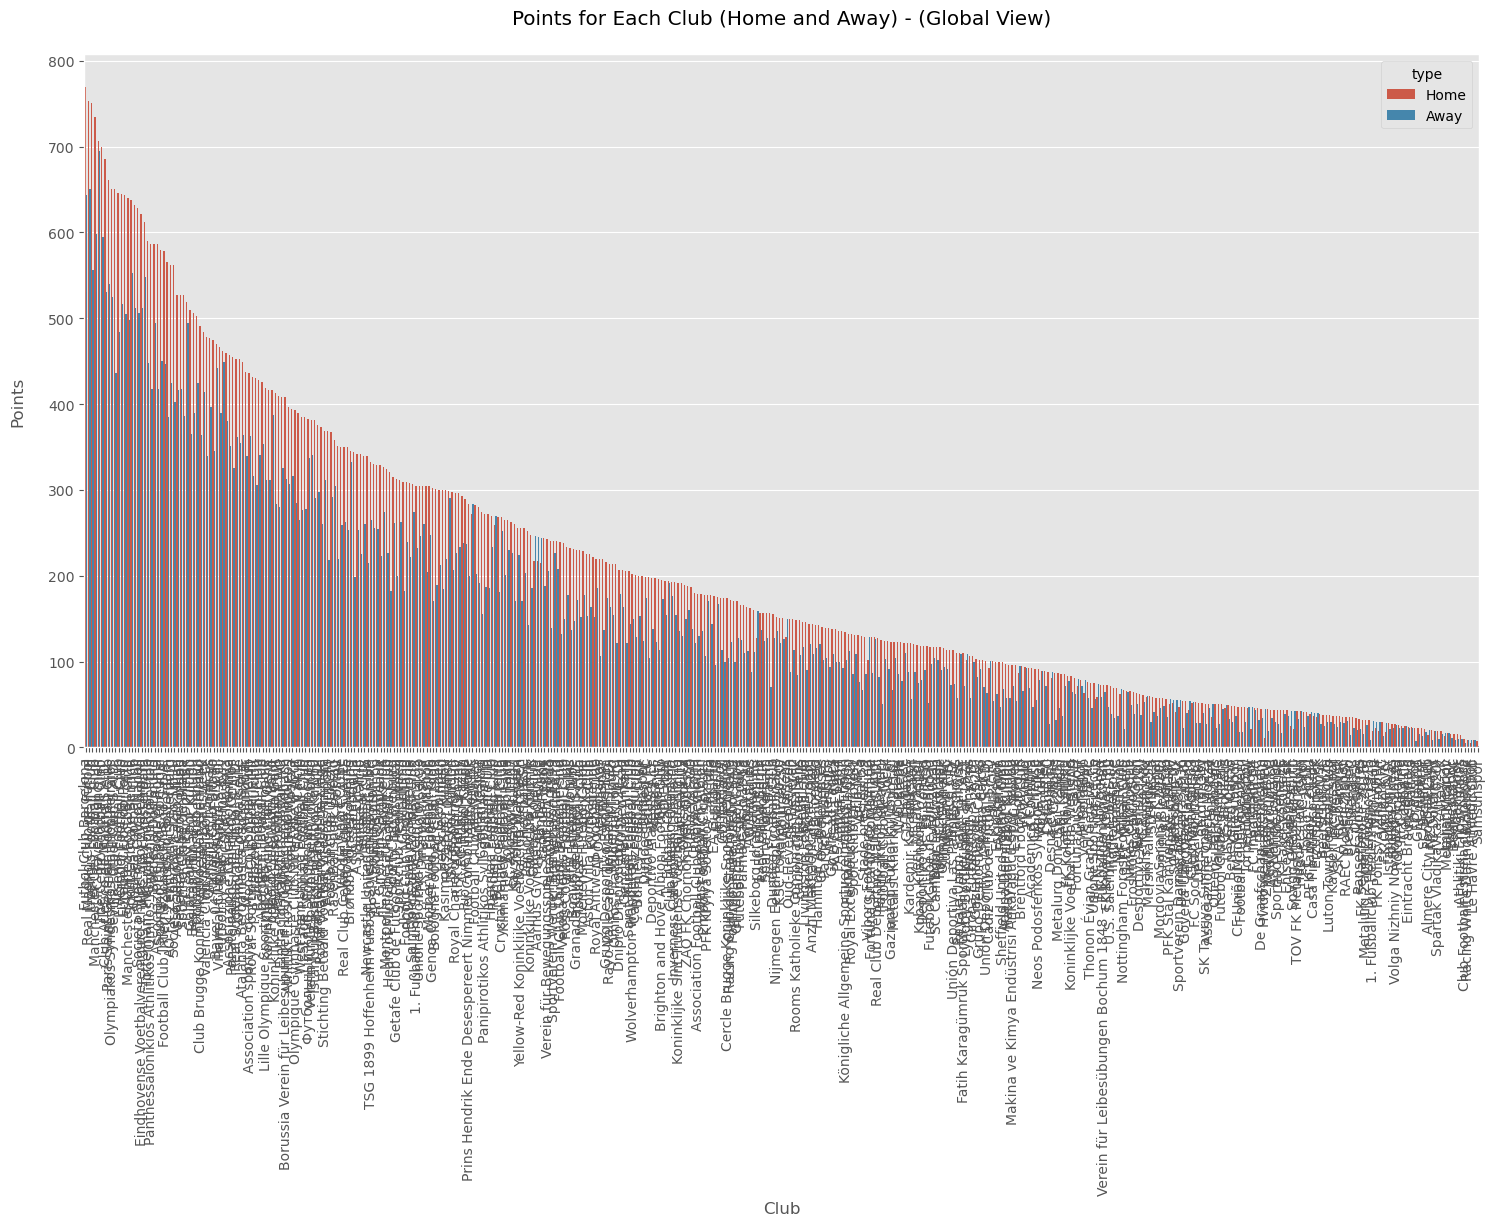

In [19]:
# Create a DataFrame for home points
home_points_df = combined_metrics[['club_name', 'home_points']].copy()
home_points_df['type'] = 'Home'
home_points_df.rename(columns={'home_points': 'points'}, inplace=True)

# Create a DataFrame for away points
away_points_df = combined_metrics[['club_name', 'away_points']].copy()
away_points_df['type'] = 'Away'
away_points_df.rename(columns={'away_points': 'points'}, inplace=True)

# Combine home and away points DataFrames
points_df = pd.concat([home_points_df, away_points_df])

# Sort points_df by points in descending order
points_df = points_df.sort_values(by='points', ascending=False)

# Plot the points for each club
plt.figure(figsize=(18, 9))
sns.barplot(x='club_name', y='points', hue='type', data=points_df)
plt.title('Points for Each Club (Home and Away) - (Global View)\n')
plt.xlabel('Club')
plt.ylabel('Points\n')
plt.xticks(rotation=90)
plt.show()

### Generate and Visualize Highest Points for Each Club
Sorts points_df by points in descening order, select the top 50 and plot them.

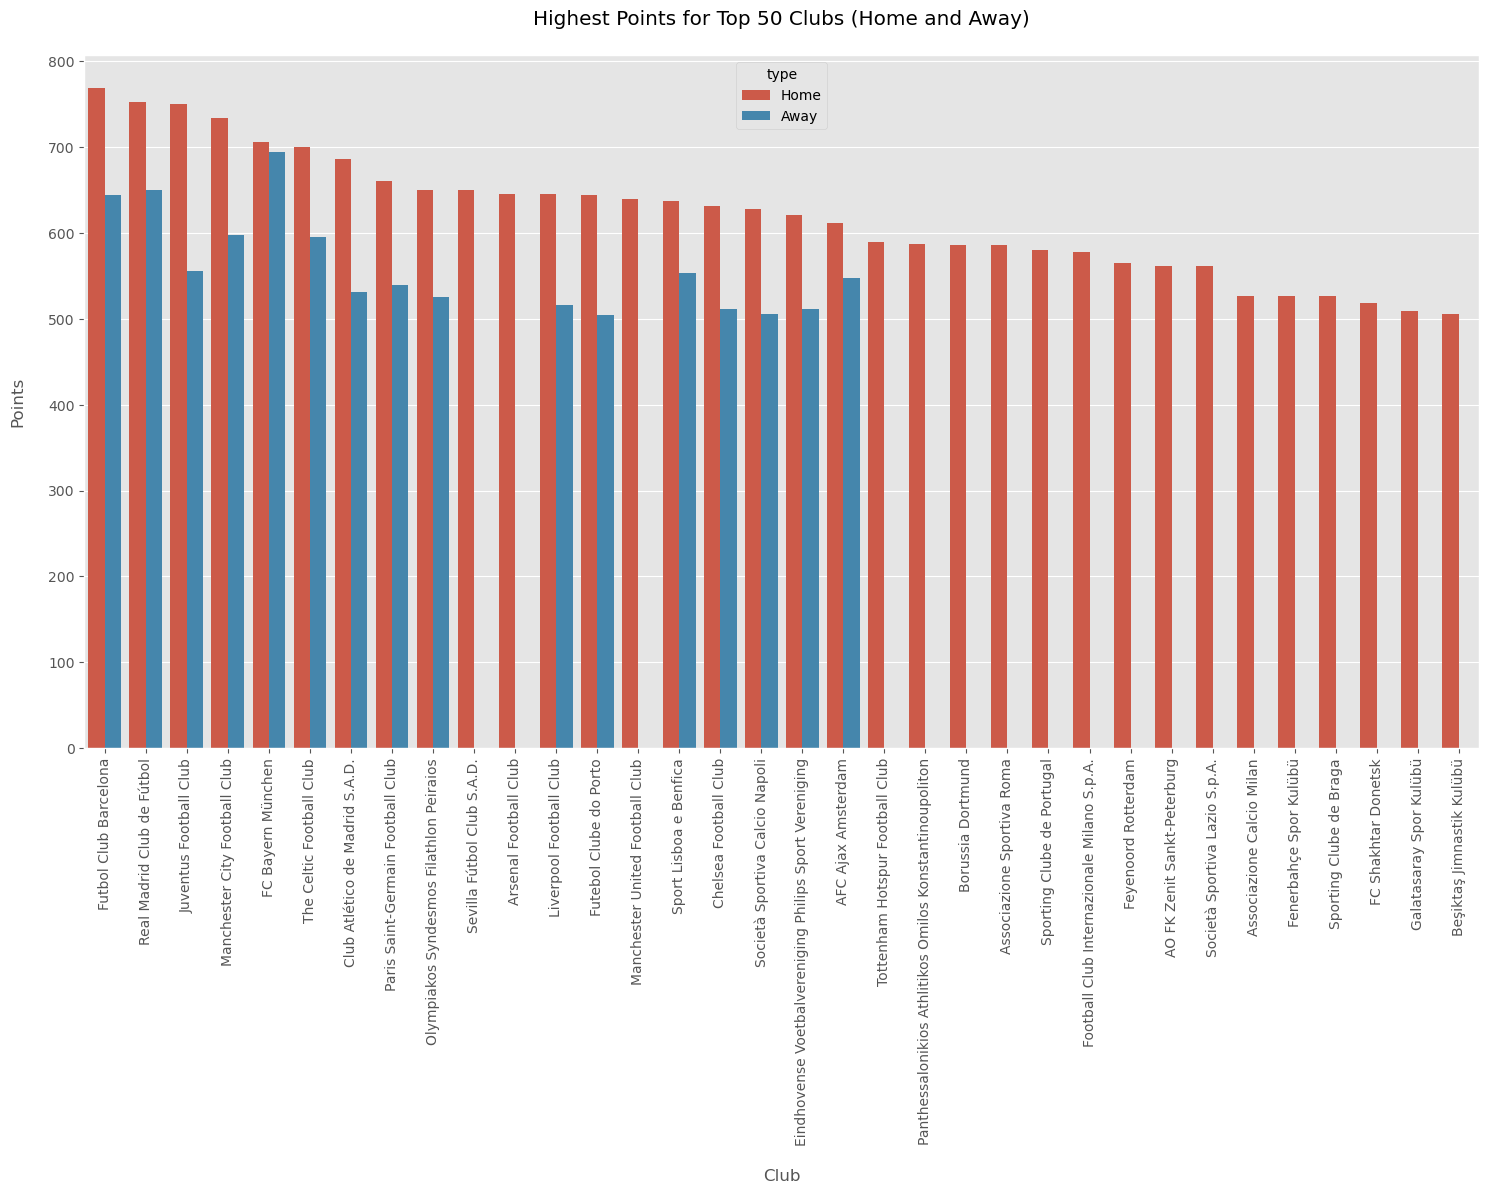

In [20]:
# Assuming combined_metrics DataFrame already exists with home_points, away_points, and club_name columns

# Create a DataFrame for home points
home_points_df = combined_metrics[['club_name', 'home_points']].copy()
home_points_df['type'] = 'Home'
home_points_df.rename(columns={'home_points': 'points'}, inplace=True)

# Create a DataFrame for away points
away_points_df = combined_metrics[['club_name', 'away_points']].copy()
away_points_df['type'] = 'Away'
away_points_df.rename(columns={'away_points': 'points'}, inplace=True)

# Combine home and away points DataFrames
points_df = pd.concat([home_points_df, away_points_df])

# Sort points_df by points in descending order
points_df = points_df.sort_values(by='points', ascending=False)

# Select the top 50 clubs
top_50_points_df = points_df.head(50)

# Plot the points for each club
plt.figure(figsize=(18, 9))
sns.barplot(x='club_name', y='points', hue='type', data=top_50_points_df)
plt.title('Highest Points for Top 50 Clubs (Home and Away)\n')
plt.xlabel('\nClub')
plt.ylabel('Points\n')
plt.xticks(rotation=90)
plt.show()


### Generate and Visualize Lowest Points for Each Club
Sorts points_df by points in ascending order, select the top 50 and plot them.

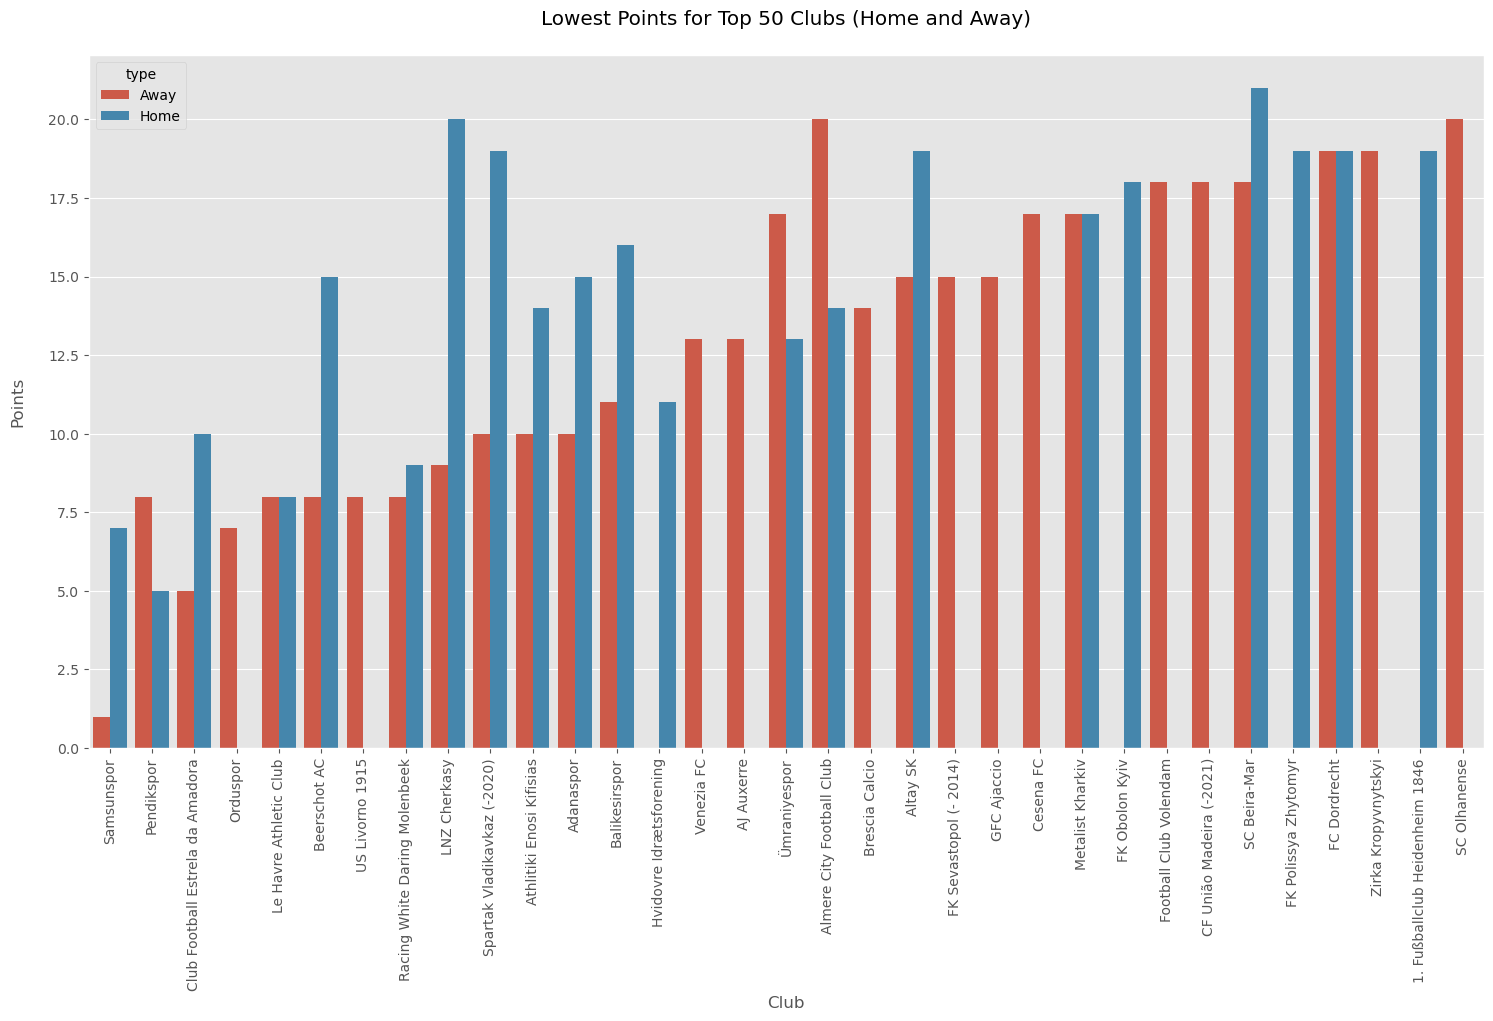

In [21]:
# Assuming combined_metrics DataFrame already exists with home_points, away_points, and club_name columns

# Create a DataFrame for home points
home_points_df = combined_metrics[['club_name', 'home_points']].copy()
home_points_df['type'] = 'Home'
home_points_df.rename(columns={'home_points': 'points'}, inplace=True)

# Create a DataFrame for away points
away_points_df = combined_metrics[['club_name', 'away_points']].copy()
away_points_df['type'] = 'Away'
away_points_df.rename(columns={'away_points': 'points'}, inplace=True)

# Combine home and away points DataFrames
points_df = pd.concat([home_points_df, away_points_df])

# Sort points_df by points in ascending order
points_df = points_df.sort_values(by='points', ascending=True)

# Select the top 50 clubs
top_50_points_df = points_df.head(50)

# Plot the points for each club
plt.figure(figsize=(18, 9))
sns.barplot(x='club_name', y='points', hue='type', data=top_50_points_df)
plt.title('Lowest Points for Top 50 Clubs (Home and Away)\n')
plt.xlabel('Club')
plt.ylabel('Points\n')
plt.xticks(rotation=90)
plt.show()
